In [1]:
!pip install pandas -q

In [2]:
!pip install numpy -q

In [3]:
!pip install tensorflow -q

In [4]:
!pip install matplotlib -q

In [5]:
!pip install seaborn -q

In [6]:
!pip install scikit-learn -q

In [7]:
!pip install openpyxl -q

In [43]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
import re
import csv

In [54]:
df = pd.read_csv("./16-clasificador/IMDB Dataset SPANISH.csv")

In [55]:
df.head()

,Unnamed: 0,review_en,review_es,sentiment,sentimiento
0,0,One of the other reviewers has mentioned that ...,Uno de los otros críticos ha mencionado que de...,positive,positivo
1,1,A wonderful little production. The filming tec...,Una pequeña pequeña producción.La técnica de f...,positive,positivo
2,2,I thought this was a wonderful way to spend ti...,Pensé que esta era una manera maravillosa de p...,positive,positivo
3,3,Basically there's a family where a little boy ...,"Básicamente, hay una familia donde un niño peq...",negative,negativo
4,4,"Petter Mattei's ""Love in the Time of Money"" is...","El ""amor en el tiempo"" de Petter Mattei es una...",positive,positivo


In [56]:
df = df[['sentimiento', 'review_es']]

In [59]:
df

,sentimiento,review_es
0,positivo,Uno de los otros críticos ha mencionado que de...
1,positivo,Una pequeña pequeña producción.La técnica de f...
2,positivo,Pensé que esta era una manera maravillosa de p...
3,negativo,"Básicamente, hay una familia donde un niño peq..."
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una..."
...,...,...
49995,positivo,Pensé que esta película hizo un buen trabajo a...
49996,negativo,"Mala parcela, mal diálogo, mala actuación, dir..."
49997,negativo,Soy católica enseñada en escuelas primarias pa...
49998,negativo,Voy a tener que estar en desacuerdo con el com...


<Axes: >

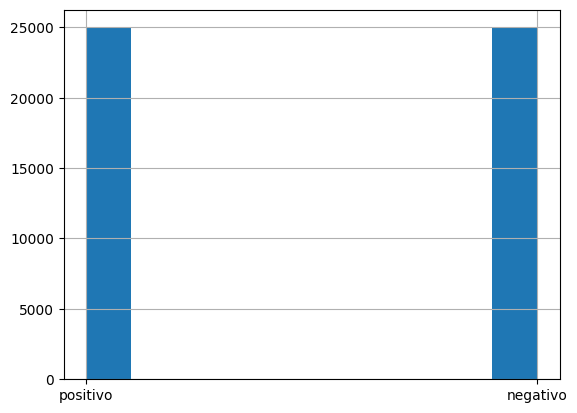

In [58]:
df['sentimiento'].hist()

In [60]:
target_map = {'positivo': 1, 'negativo': 0}
df['objetivo'] = df['sentimiento'].map(target_map)

In [61]:
df.head(10)

,sentimiento,review_es,objetivo
0,positivo,Uno de los otros críticos ha mencionado que de...,1
1,positivo,Una pequeña pequeña producción.La técnica de f...,1
2,positivo,Pensé que esta era una manera maravillosa de p...,1
3,negativo,"Básicamente, hay una familia donde un niño peq...",0
4,positivo,"El ""amor en el tiempo"" de Petter Mattei es una...",1
5,positivo,Probablemente mi película favorita de todos lo...,1
6,positivo,Seguro que me gustaría ver una resurrección de...,1
7,negativo,"Este espectáculo fue una idea increíble, fresc...",0
8,negativo,Alentados por los comentarios positivos sobre ...,0
9,positivo,"Si te gusta la risa original desgarradora, te ...",1


In [62]:
df_train, df_test = train_test_split(df, random_state=42)

In [63]:
# Vectorizar los textos de reseñas utilizando TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['review_es'])
X_test = vectorizer.transform(df_test['review_es'])

In [64]:
# Convertir los conjuntos de datos a arrays
X_train = X_train.toarray()
X_test = X_test.toarray()

In [65]:
# Extraer las etiquetas objetivo
Y_train = df_train['objetivo']
Y_test = df_test['objetivo']

In [66]:
# Obtener la cantidad de características
D = X_train.shape[1]

In [67]:
D

2000

In [68]:
# Definir la arquitectura del modelo
i = Input(shape=(D,))
x = Dense(1)(i)  # La función sigmoid está incluida en la pérdida

In [69]:
model = Model(i, x)

In [70]:
# Mostrar un resumen del modelo
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         2,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,001 (7.82 KB)

 Trainable params: 2,001 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
# Compilar el modelo
model.compile(
    loss=BinaryCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
)

In [72]:
# Entrenar el modelo
r = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=100,
    batch_size=128,
)

Epoch 1/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6020 - loss: 0.5901 - val_accuracy: 0.7965 - val_loss: 0.4236
Epoch 2/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8190 - loss: 0.4017 - val_accuracy: 0.8283 - val_loss: 0.3654
Epoch 3/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8441 - loss: 0.3519 - val_accuracy: 0.8385 - val_loss: 0.3410
Epoch 4/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8552 - loss: 0.3285 - val_accuracy: 0.8430 - val_loss: 0.3289
Epoch 5/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8602 - loss: 0.3143 - val_accuracy: 0.8543 - val_loss: 0.3208
Epoch 6/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8682 - loss: 0.3018 - val_accuracy: 0.8506 - val_loss: 0.3169
Epoch 7/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 981us/step - accuracy: 0.8681 - loss: 0.3016 - val_accuracy: 0.8568 - val_loss: 0.3136
Epoch 8/100
293/293 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8713 - loss: 0.2937 - val_ac

In [73]:
# Realizar predicciones
P_train = ((model.predict(X_train) > 0) * 1.0).flatten()
P_test = ((model.predict(X_test) > 0) * 1.0).flatten()

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 532us/step
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step


In [74]:
# Calcular la matriz de confusión
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.87714271, 0.12285729],
       [0.10703757, 0.89296243]])

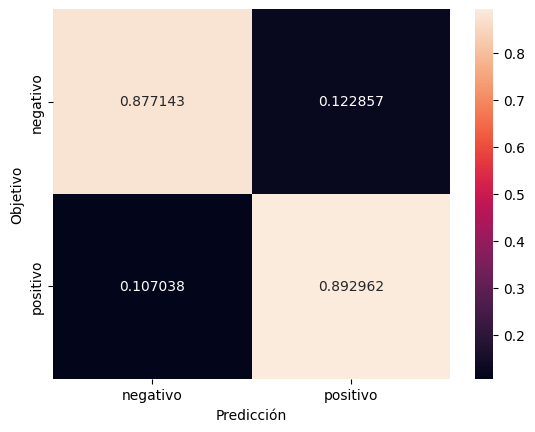

In [75]:
def plot_cm(cm):
    classes = ['negativo', 'positivo']
    df_cm = pd.DataFrame(cm, index=classes, columns=classes)
    ax = sn.heatmap(df_cm, annot=True, fmt='g')
    ax.set_xlabel("Predicción")
    ax.set_ylabel("Objetivo")

plot_cm(cm)

In [76]:
Pr_train = model.predict(X_train)
Pr_test = model.predict(X_test)
print("Train AUC:", roc_auc_score(Y_train, Pr_train))
print("Test AUC:", roc_auc_score(Y_test, Pr_test))

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step
391/391 ━━━━━━━━━━━━━━━━━━━━ 0s 531us/step
Train AUC: 0.9539041701466102
Test AUC: 0.9367505396586882


In [77]:
print("Train F1:", f1_score(Y_train, P_train))
print("Test F1:", f1_score(Y_test, P_test))

Train F1: 0.8854166666666666
Test F1: 0.8646493079990617
